# Setup

In [1]:
import pandas as pd
from scipy import stats

In [2]:
import seaborn as sns

In [3]:
import numpy as np

# Laod Data

In [4]:
filename = './output02.csv'
df = pd.read_csv(filename, header=0, index_col=0)
df.head()

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,
3,2,LowIOS,5,3,0,0.0,[ 0.12970965 -0.02112623 -0.02253387 0.043296...,[ 0.10904028 -0.08473143 0.05675215 0.057820...,both,0.581706,3.300618,0.626
11,2,LowIOS,1,6,0,0.0,[ 0.04467268 -0.02641947 0.1916748 0.042756...,[ 0.04378919 0.02432722 -0.09181204 0.066824...,both,0.980559,5.501461,0.352
13,6,HighIOS,2,3,0,0.0,[-0.00738698 0.10435431 -0.17571743 0.071207...,[ 0.1713229 0.03118779 0.00279703 -0.021871...,both,0.980611,5.779664,0.203
17,3,LowIOS,5,2,0,0.0,[ 0.00619531 -0.04341352 -0.06554738 -0.015299...,[ 0.10074951 -0.03477319 0.01334162 0.099734...,both,0.870356,5.114403,0.384
22,6,HighIOS,2,5,2,0.4,[ 0.04037306 0.01481102 0.16814518 0.082948...,[ 0.04354712 0.00518411 0.02660024 0.043834...,both,0.629677,3.410520,0.615


In [5]:
df = df.dropna()
df.head()

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,
3,2,LowIOS,5,3,0,0.0,[ 0.12970965 -0.02112623 -0.02253387 0.043296...,[ 0.10904028 -0.08473143 0.05675215 0.057820...,both,0.581706,3.300618,0.626
11,2,LowIOS,1,6,0,0.0,[ 0.04467268 -0.02641947 0.1916748 0.042756...,[ 0.04378919 0.02432722 -0.09181204 0.066824...,both,0.980559,5.501461,0.352
13,6,HighIOS,2,3,0,0.0,[-0.00738698 0.10435431 -0.17571743 0.071207...,[ 0.1713229 0.03118779 0.00279703 -0.021871...,both,0.980611,5.779664,0.203
17,3,LowIOS,5,2,0,0.0,[ 0.00619531 -0.04341352 -0.06554738 -0.015299...,[ 0.10074951 -0.03477319 0.01334162 0.099734...,both,0.870356,5.114403,0.384
22,6,HighIOS,2,5,2,0.4,[ 0.04037306 0.01481102 0.16814518 0.082948...,[ 0.04354712 0.00518411 0.02660024 0.043834...,both,0.629677,3.410520,0.615


# Descriptive Statistics on Overlap Score

In [6]:
# Low IOS Group
df.loc[df['IOS_group'] == 'LowIOS', ['Overlap_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overlap_score,29.0,0.088629,0.158935,0.0,0.0,0.0,0.166667,0.666667


In [7]:
# High IOS Group
df.loc[df['IOS_group'] == 'HighIOS', ['Overlap_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
Overlap_score,20.0,0.104668,0.126781,0.0,0.0,0.091667,0.142857,0.4


# Visualization

## Overlapping Score

### Overlapping Score: Histogram

array([<Axes: title={'center': 'HighIOS'}>,
       <Axes: title={'center': 'LowIOS'}>], dtype=object)

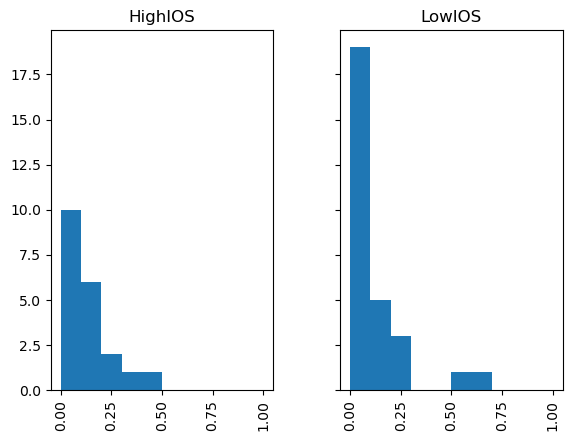

In [8]:
df['Overlap_score'].hist(by=df['IOS_group'], range=[0, 1], sharey=True)

### Overlapping Score: Boxplot

<Axes: title={'center': 'Overlap_score'}, xlabel='[IOS_group]'>

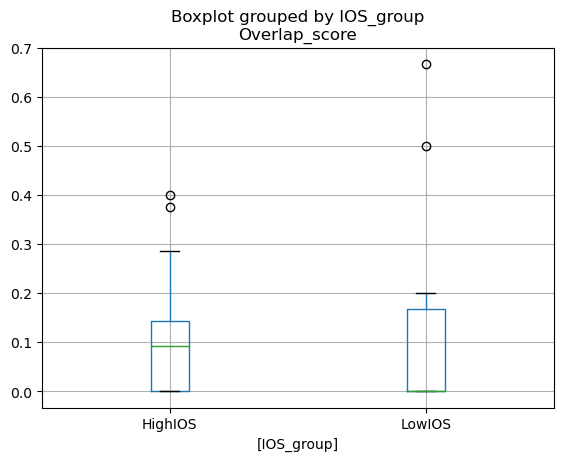

In [9]:
df.boxplot(column=['Overlap_score'], by=['IOS_group'])

### Overlapping Score: Scatter plot

<Axes: xlabel='Overlap_score', ylabel='IOS_score'>

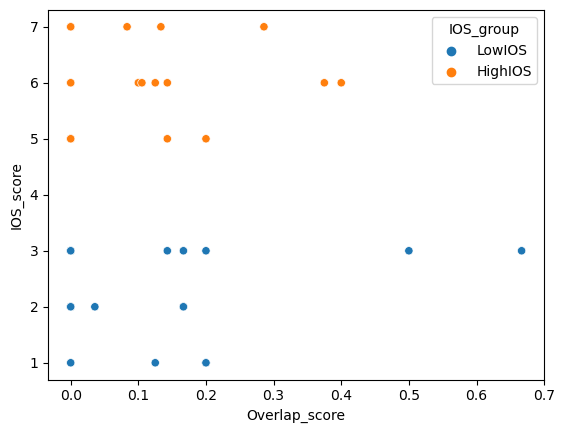

In [10]:
sns.scatterplot(x='Overlap_score', y='IOS_score', hue='IOS_group', data=df)

## Euclidean Distance

### Euclidean Distance: Histogram

array([<Axes: title={'center': 'HighIOS'}>,
       <Axes: title={'center': 'LowIOS'}>], dtype=object)

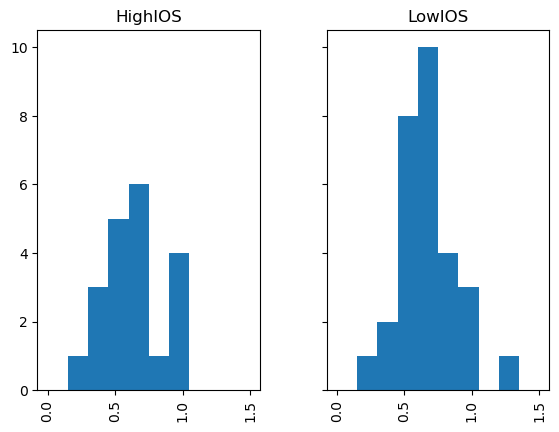

In [11]:
df['euclidean_distance'].hist(by=df['IOS_group'], range=[0, 1.5], sharey=True)

### Euclidean Distance: Boxplot

<Axes: title={'center': 'euclidean_distance'}, xlabel='[IOS_group]'>

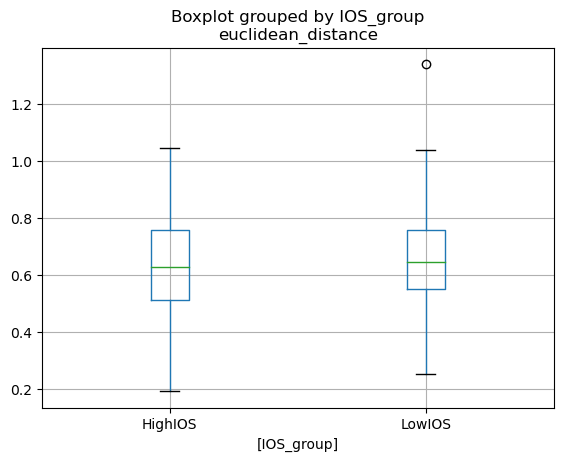

In [12]:
df.boxplot(column=['euclidean_distance'], by=['IOS_group'])

### Euclidean Distance: Scatter plot

<Axes: xlabel='euclidean_distance', ylabel='IOS_score'>

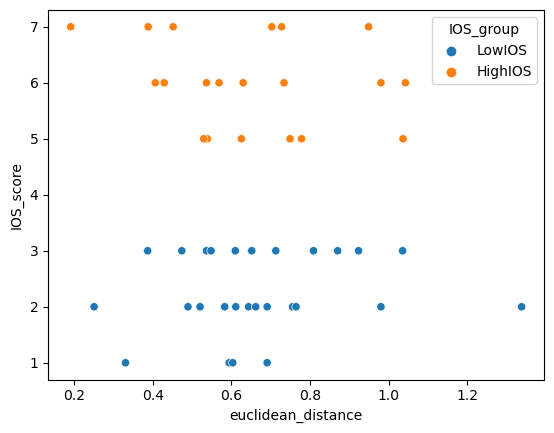

In [13]:
sns.scatterplot(x='euclidean_distance', y='IOS_score', hue='IOS_group', data=df)

## Manhattan Distance

### Manhattan Distance: Histogram

array([<Axes: title={'center': 'HighIOS'}>,
       <Axes: title={'center': 'LowIOS'}>], dtype=object)

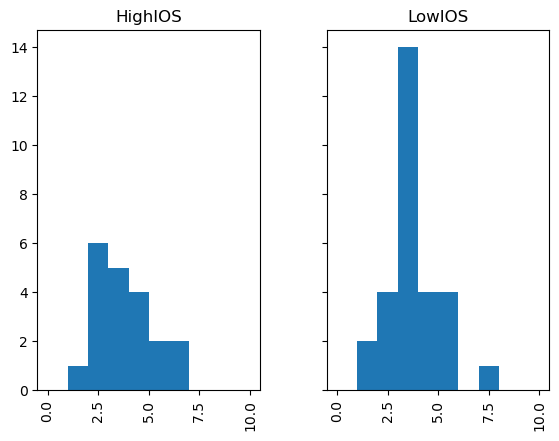

In [14]:
df['manhattan_distance'].hist(by=df['IOS_group'], range=[0, 10], sharey=True)

### Manhattan Distance: Boxplot

<Axes: title={'center': 'manhattan_distance'}, xlabel='[IOS_group]'>

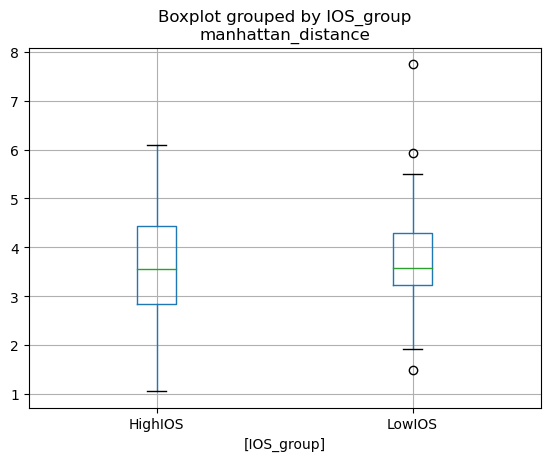

In [15]:
df.boxplot(column=['manhattan_distance'], by=['IOS_group'])

### Manhattan Distance: Scatter plot

<Axes: xlabel='manhattan_distance', ylabel='IOS_score'>

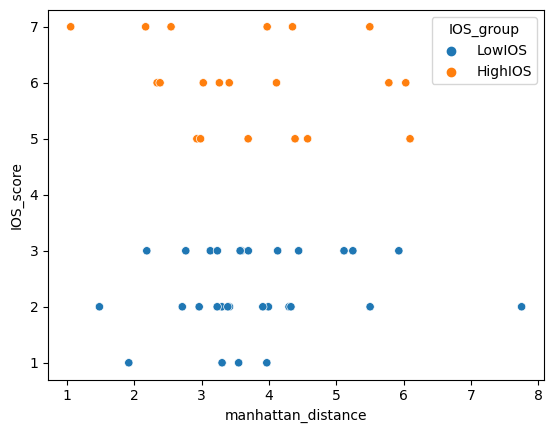

In [16]:
sns.scatterplot(x='manhattan_distance', y='IOS_score', hue='IOS_group', data=df)

## Cosine Similarity

### Cosine Similarity: Histogram

array([<Axes: title={'center': 'HighIOS'}>,
       <Axes: title={'center': 'LowIOS'}>], dtype=object)

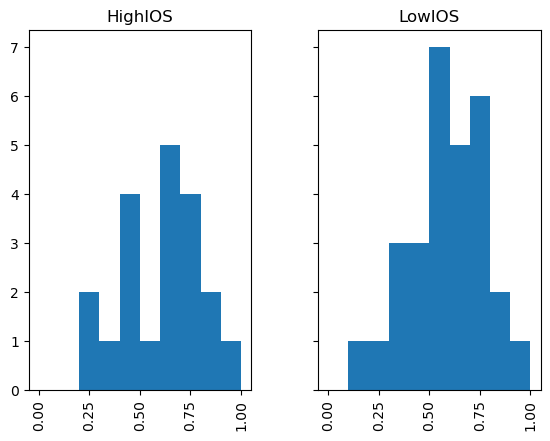

In [17]:
df['cosine_similarity'].hist(by=df['IOS_group'], range=[0, 1], sharey=True)

### Cosine Similarity: Boxplot

<Axes: title={'center': 'cosine_similarity'}, xlabel='[IOS_group]'>

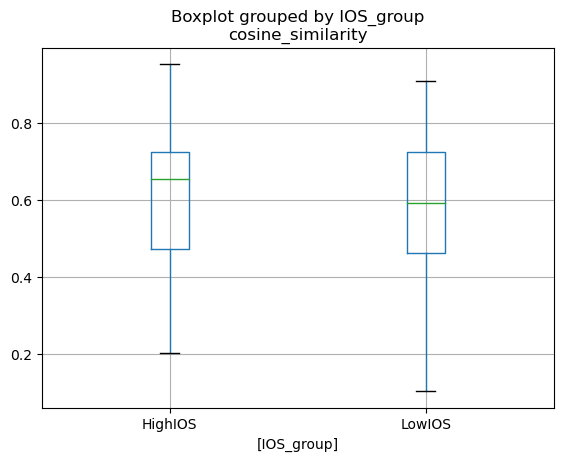

In [18]:
df.boxplot(column=['cosine_similarity'], by=['IOS_group'])

### Cosine Similarity: Scatter plot

<Axes: xlabel='cosine_similarity', ylabel='IOS_score'>

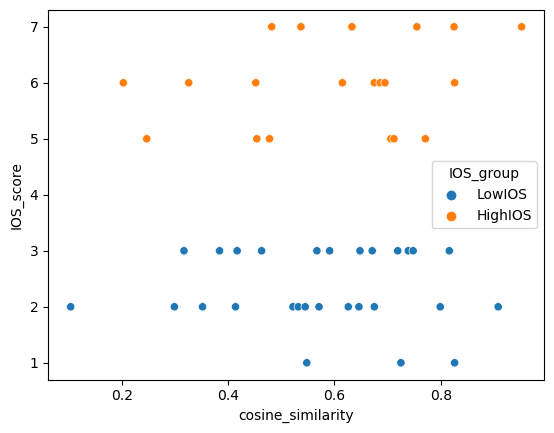

In [19]:
sns.scatterplot(x='cosine_similarity', y='IOS_score', hue='IOS_group', data=df)

# Check the Outliers

In [20]:
df.loc[df['Overlap_score'] == 1, :]

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,


# Confirmatory Analyses

## 01: a one-tailed independent two-sample t-test
The author had planned:
- sample size: 51 for each group
- alpha: 0.05
- effect size: 0.5
- power: 0.8

In [21]:
groupH = df[df['IOS_group']=='HighIOS']
groupL = df[df['IOS_group']=='LowIOS']

### Overlapping Magnitude

In [22]:
stats.ttest_ind(groupH['Overlap_score'], groupL['Overlap_score'], equal_var=False, alternative="greater") # perform Welch's t-test without assuming equal population variance.

TtestResult(statistic=0.3919290632895706, pvalue=0.34846206010394787, df=45.90966149288226)

In [23]:
stats.ttest_ind(groupH['Overlap_score'], groupL['Overlap_score'], equal_var=False, alternative="less") # perform Welch's t-test without assuming equal population variance.

TtestResult(statistic=0.3919290632895706, pvalue=0.6515379398960521, df=45.90966149288226)

### Euclidean Distance

In [24]:
stats.ttest_ind(groupH['euclidean_distance'], groupL['euclidean_distance'], equal_var=False, alternative="less")

TtestResult(statistic=-0.23905560544922527, pvalue=0.4061483735458366, df=39.55631410537324)

In [25]:
stats.ttest_ind(groupH['euclidean_distance'], groupL['euclidean_distance'], equal_var=False, alternative="greater")

TtestResult(statistic=-0.23905560544922527, pvalue=0.5938516264541633, df=39.55631410537324)

### Manhattan Distance

In [26]:
stats.ttest_ind(groupH['manhattan_distance'], groupL['manhattan_distance'], equal_var=False, alternative="less")

TtestResult(statistic=-0.1665628560095142, pvalue=0.43429494562790094, df=38.31660501168952)

In [27]:
stats.ttest_ind(groupH['manhattan_distance'], groupL['manhattan_distance'], equal_var=False, alternative="greater")

TtestResult(statistic=-0.1665628560095142, pvalue=0.5657050543720992, df=38.31660501168952)

### Cosine Similarity

In [28]:
stats.ttest_ind(groupH['cosine_similarity'], groupL['cosine_similarity'], equal_var=False, alternative="greater")

TtestResult(statistic=0.33441885220912226, pvalue=0.36993138988365026, df=38.83843127726019)

In [29]:
stats.ttest_ind(groupH['cosine_similarity'], groupL['cosine_similarity'], equal_var=False, alternative="less")

TtestResult(statistic=0.33441885220912226, pvalue=0.6300686101163497, df=38.83843127726019)

In [30]:
stats.ttest_ind(groupH['cosine_similarity'], groupL['cosine_similarity'], equal_var=False, alternative="two-sided")

TtestResult(statistic=0.33441885220912226, pvalue=0.7398627797673005, df=38.83843127726019)

In [31]:
df[['IOS_group', 'cosine_similarity']].groupby('IOS_group').mean()

,cosine_similarity
IOS_group,
HighIOS,0.601500
LowIOS,0.582655


In [32]:
df[['IOS_group', 'cosine_similarity']].groupby('IOS_group').std()

,cosine_similarity
IOS_group,
HighIOS,0.199902
LowIOS,0.184782


### Post hoc Power Analysis

In [33]:
print('Num. of group H: ' + str(len(groupH)))
print('Num. of group L: ' + str(len(groupL)))

Num. of group H: 20
Num. of group L: 29


In [34]:
def cohens_d(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    x1_mean = x1.mean()
    x2_mean = x2.mean()
    s1 = x1.std()
    s2 = x2.std()
    s = np.sqrt((n1*np.square(s1) + n2*np.square(s2)) / (n1 + n2))
    d = np.abs(x1_mean - x2_mean) / s
    return d

In [35]:
euclidean_d = cohens_d(groupH['euclidean_distance'], groupL['euclidean_distance'])
print('Cohen''s d (Euclidean distance): {:.4f}'.format(euclidean_d))
manhattan_d = cohens_d(groupH['manhattan_distance'], groupL['manhattan_distance'])
print('Cohen''s d (Manhattan distance): {:.4f}'.format(manhattan_d))
cosine_d = cohens_d(groupH['cosine_similarity'], groupL['cosine_similarity'])
print('Cohen''s d (Cosine similarity): {:.4f}'.format(cosine_d))

Cohens d (Euclidean distance): 0.0702
Cohens d (Manhattan distance): 0.0493
Cohens d (Cosine similarity): 0.0986


In [36]:
# Compute post hoc power powered by G*Power
print('Post hoc power (Euclidean distance): {:.4f}'.format(0.0797))
print('Post hoc power (Manhattan distance): {:.4f}'.format(0.0697))
print('Post hoc power (Cosine similarity): {:.4f}'.format(0.0950))

Post hoc power (Euclidean distance): 0.0797
Post hoc power (Manhattan distance): 0.0697
Post hoc power (Cosine similarity): 0.0950


## 02: Spearman's rank correlation coefficient between the IOS scores and the overlapping scores
The author had planned:
- sample size: 119, including participants who rated on the IOS scale as 4
- alpha: 0.05
- effect size: 0.3
- power: 0.93
- two-tailed


### Overlapping score

In [37]:
df.head(1)

,IOS_score,IOS_group,wc_self,wc_target,wc_intercept,Overlap_score,word_vec_avg_self,word_vec_avg_target,_merge,euclidean_distance,manhattan_distance,cosine_similarity
MID,,,,,,,,,,,,
3,2,LowIOS,5,3,0,0.0,[ 0.12970965 -0.02112623 -0.02253387 0.043296...,[ 0.10904028 -0.08473143 0.05675215 0.057820...,both,0.581706,3.300618,0.626


In [38]:
iosscores = df['IOS_score']
overlapscores = df['Overlap_score']

In [39]:
res = stats.spearmanr(iosscores, overlapscores)
res

SignificanceResult(statistic=0.11364680286006125, pvalue=0.436855094189893)

### Euclidean Dsitance

In [40]:
euclidean_distance = df['euclidean_distance']
res = stats.spearmanr(iosscores, euclidean_distance)
res

SignificanceResult(statistic=-0.008546703806590266, pvalue=0.9535228101560276)

### Manhattan Distance

In [41]:
manhattan_distance = df['manhattan_distance']
res = stats.spearmanr(iosscores, manhattan_distance)
res

SignificanceResult(statistic=-0.002605702380058008, pvalue=0.9858230834730011)

### Cosine Similarity

In [42]:
cosine_similarity = df['cosine_similarity']
res = stats.spearmanr(iosscores, cosine_similarity)
res

SignificanceResult(statistic=0.05386399059772844, pvalue=0.7131853993304413)

### Post hoc Power Analysis

In [43]:
print('Num. of Sumple of the IOS socre: ' + str(len(iosscores)))
print('Num. of Sumple of the Overlapping socre: ' + str(len(overlapscores)))

Num. of Sumple of the IOS socre: 49
Num. of Sumple of the Overlapping socre: 49


Achieved power: 0.0961 (H1: rho1 = 0.05)